# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.


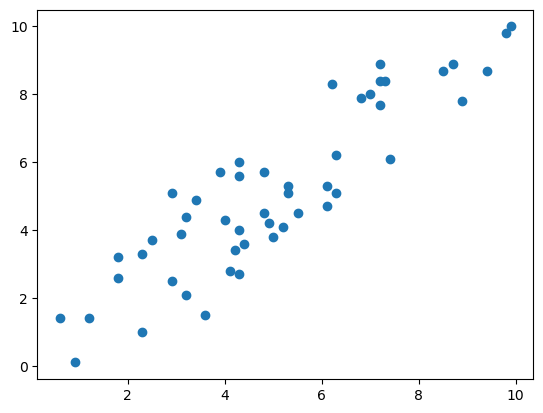

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = (np.random.random(50) *10).round(1)
p1[p1>10] = 10
p1[p1<0] = 0

p2 = (p1 + np.random.normal(0,1,50)).round(1)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
plt.scatter(x = df.p1, y=df.p2)


## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [13]:
df['média'] = df.mean(axis=1)
df['diferença'] = (df.p2-df.p1)
df.style.format(precision=1, decimal=',')
df.head(10)

,p1,p2,média,diferença
0,7.0,8.0,7.50,1.0
1,2.9,5.1,4.00,2.2
2,2.3,1.0,1.65,-1.3
3,5.5,4.5,5.00,-1.0
4,7.2,8.9,8.05,1.7
5,4.2,3.4,3.80,-0.8
6,9.8,9.8,9.80,0.0
7,6.8,7.9,7.35,1.1
8,4.8,5.7,5.25,0.9
9,3.9,5.7,4.80,1.8


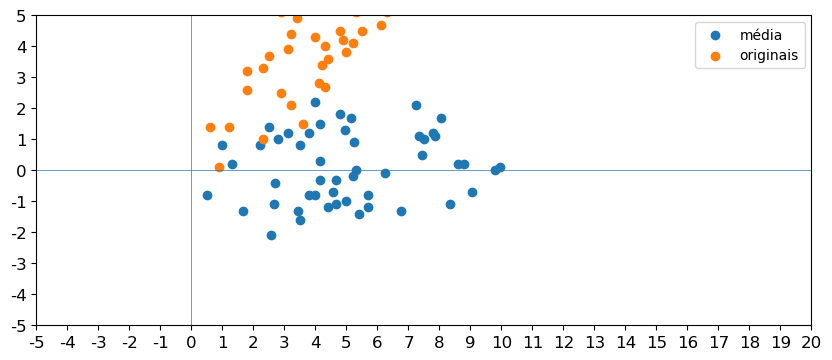

In [25]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -5
xmax = 20
ymin = -5
ymax = 5

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')


#linhas horizontais e verticais
ax.axvline(0, linewidth=.5, linestyle='-')
ax.axhline(0, linewidth=.5, linestyle='-')

# Plotar a média
plt.scatter(df['média'], df['diferença'], label='média')

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Méedia e Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')

#Legenda
plt.legend()

b) Calcule a correlação entre os dados da **p1** e **p2**




In [28]:
corr=df.p1.corr(df.p2)
corr

0.8952457021281092

c) Calcule a correlação entre os dados transformados (média e diferença)



In [29]:
corr_media_diferenca=df['média'].corr(df['diferença'])
corr_media_diferenca

0.13639322840911466

d) Comente as correlações observadas.

O coeficiente de 0,89 entre p1  p2 indica uma correlação positiva forte. Isso sugere que, em geral, conforme uma variável aumenta, a outra também tende a aumentar de maneira consistente. Ja em relação o resultao de 0,13 entre média e diferença, embora a correlação seja positiva, a relação linear entre as variáveis é muito fraca. Isso significa que não há uma tendência clara de que, quando uma variável aumenta, a outra também aumente de forma previsível.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [17]:
df['soma'] = df.p1 + df.p2 
df['diferença'] = (df.p2-df.p1)
df.style.format(precision=1, decimal=',')
df.head(10)

,p1,p2,média,diferença,soma
0,7.0,8.0,7.50,1.0,15.0
1,2.9,5.1,4.00,2.2,8.0
2,2.3,1.0,1.65,-1.3,3.3
3,5.5,4.5,5.00,-1.0,10.0
4,7.2,8.9,8.05,1.7,16.1
5,4.2,3.4,3.80,-0.8,7.6
6,9.8,9.8,9.80,0.0,19.6
7,6.8,7.9,7.35,1.1,14.7
8,4.8,5.7,5.25,0.9,10.5
9,3.9,5.7,4.80,1.8,9.6


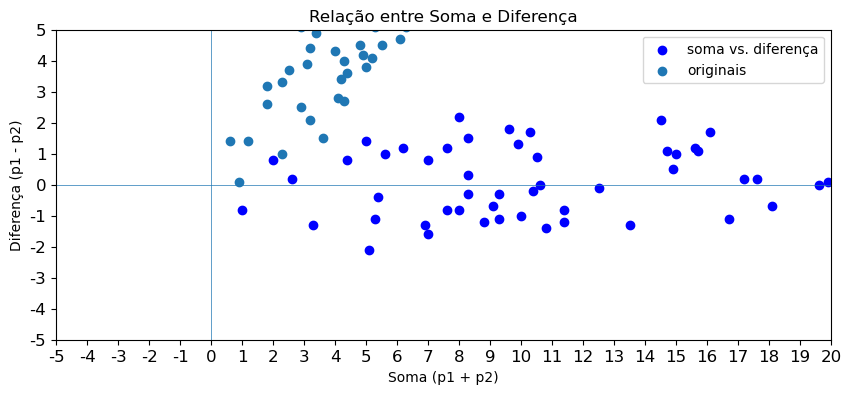

In [31]:
# Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

xmin = -5
xmax = 20
ymin = -5
ymax = 5

ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax) + 1))
ax.set_xticks(lista_xticks)
ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax) + 1))
ax.set_yticks(lista_yticks)
ax.set_yticklabels(lista_yticks, fontsize='large')

# Linhas horizontais e verticais
ax.axvline(0, linewidth=.5, linestyle='-')
ax.axhline(0, linewidth=.5, linestyle='-')

# Plotar a soma versus a diferença
plt.scatter(df['soma'], df['diferença'], label='soma vs. diferença', color='blue')

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Soma e Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')

# Legenda
plt.legend()

# Mostrar o gráfico
plt.show()

Deste gráfico é possível extrair que, após a transformação de dados para gerar a diferença e a soma entre p1 e p2, observa-se uma proporcionalidade em todos os dados.